In [2]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
def load_images_from_folder(folder_path,target_size=(92,112)):
  images=[]
  labels=[]
  for subdir in os.listdir(folder_path):
    subfolder_path=os.path.join(folder_path,subdir)
    if not os.path.isdir(subfolder_path):
      continue

    label=int(subdir[1:])
    for filename in os.listdir(subfolder_path):
      image_path=os.path.join(subfolder_path,filename)
      image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      if image is not None:
        image=cv2.resize(image,target_size)
        images.append(image)
        labels.append(label)
  return np.array(images),np.array(labels)

dataset_folder="/content/drive/MyDrive/Colab Notebooks/ORL"
images,labels=load_images_from_folder(dataset_folder)
print("Number of images loaded",len(images))
print("Number of labels loaded",len(labels))

Number of images loaded 400
Number of labels loaded 400


In [5]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [6]:
X_train.shape

(320, 112, 92)

In [7]:
X_test.shape

(80, 112, 92)

In [8]:
nsamples, nx, ny=X_train.shape
d2_train_dataset=X_train.reshape((nsamples,nx*ny))
d2_train_dataset

array([[ 55,  56,  56, ...,  69, 144, 193],
       [110, 106, 106, ...,  19,  21,  19],
       [111, 110, 114, ...,  57,  53,  48],
       ...,
       [101, 100,  99, ...,  49,  52,  52],
       [ 35,  32,  36, ...,  25,  28,  29],
       [ 44,  43,  32, ...,  43,  43,  37]], dtype=uint8)

In [9]:
nsamples, nx, ny=X_test.shape
d2_test_dataset=X_test.reshape((nsamples,nx*ny))
d2_test_dataset

array([[108, 110, 111, ...,  26,  37,  37],
       [ 45,  52,  48, ...,  48,  43,  47],
       [122, 121, 121, ...,  78,  78,  80],
       ...,
       [ 40,  37,  35, ...,  27,  30,  24],
       [ 53,  51,  49, ...,  58,  64,  60],
       [ 53,  52,  61, ...,  46,  45,  45]], dtype=uint8)

In [11]:
n=80
pca=PCA(n_components=n,random_state=42)
X_train_pca=pca.fit_transform(d2_train_dataset)
X_test_pca=pca.transform(d2_test_dataset)

In [12]:
svm_classifier=SVC()
svm_classifier.fit(X_train_pca,y_train)

SVC()

In [13]:
y_pred=svm_classifier.predict(X_test_pca)
y_pred

array([20, 17, 23, 27, 15, 24, 35, 15, 18,  6, 22, 32, 14, 23,  9, 40, 29,
       33, 28, 34, 38, 13,  3, 29, 22, 25, 37, 21,  5,  1,  3,  8, 18, 14,
       28, 37, 37,  2, 36, 30, 34, 14, 38, 12, 24, 34, 30, 31, 12,  7, 40,
       40,  5, 38, 33, 23, 21,  7, 23, 36,  6, 11, 16, 23,  1, 23,  4,  5,
        3, 23, 35, 30, 22, 40, 34, 10, 21, 32,  7, 17])

In [14]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy',accuracy)

Accuracy 0.9125


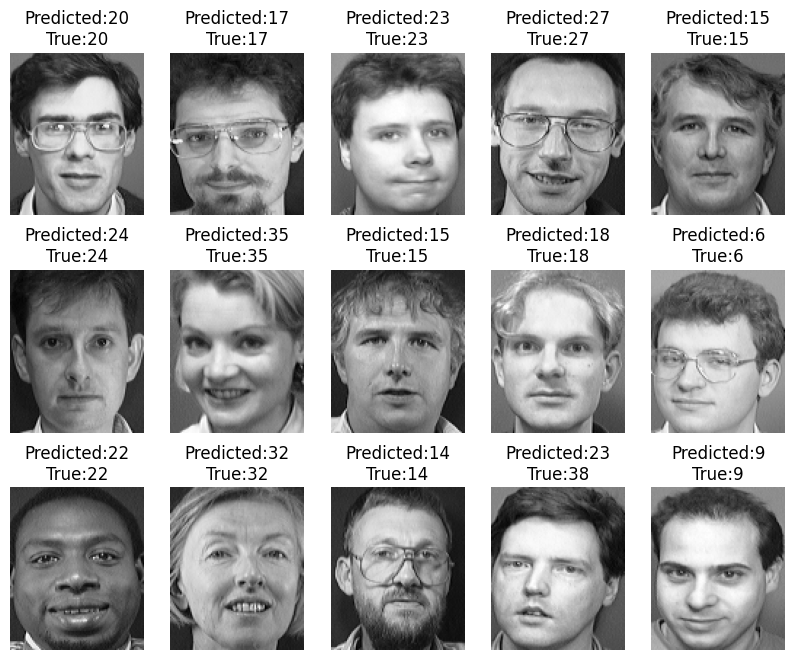

In [15]:
plt.figure(figsize=(10,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.title(f"Predicted:{y_pred[i]}\nTrue:{y_test[i]}")
  plt.axis('off')
plt.show()

In [20]:
from skimage.io import imread
from skimage.transform import resize
pgm_image_path='/content/drive/MyDrive/Colab Notebooks/ORL/s25/4.pgm'
pgm_image=imread(pgm_image_path)
nsamples, nx, ny=(1,112,92)
flattened_image=pgm_image.reshape((nsamples,nx*ny))
image_pca=pca.transform(flattened_image)
predicted_label=svm_classifier.predict(image_pca)
predicted_label

array([25])

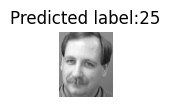

In [21]:
plt.figure(figsize=(92,112))
for i,(image,label) in enumerate(zip(pgm_image,predicted_label)):
  plt.subplot(1,len(pgm_image),1)
  plt.imshow(pgm_image,cmap='gray')
  plt.title(f"Predicted label:{label}")
  plt.axis('off')
plt.show()

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
